In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/prediction-of-mohs-hardness-with-machine-learning/jm79zfps6b-1/Mineral_Dataset_Supplementary_Info.csv
/kaggle/input/prediction-of-mohs-hardness-with-machine-learning/jm79zfps6b-1/Artificial_Crystals_Dataset.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df1 = pd.read_csv('/kaggle/input/prediction-of-mohs-hardness-with-machine-learning/jm79zfps6b-1/Mineral_Dataset_Supplementary_Info.csv')
df1.head()

,Unnamed: 0,Hardness,allelectrons_Total,density_Total,allelectrons_Average,val_e_Average,atomicweight_Average,ionenergy_Average,el_neg_chi_Average,R_vdw_element_Average,R_cov_element_Average,zaratio_Average,density_Average
0,0,2.3,110.0,23.000000,36.666667,2.666667,82.598467,8.504133,2.146667,2.006667,1.253333,0.456803,7.666667
1,1,5.5,406.0,30.472136,9.902439,4.682927,19.813180,11.456151,2.700244,1.676829,0.868293,0.522909,0.743223
2,2,5.5,406.0,30.472464,10.410256,4.923077,20.931371,11.541405,2.753590,1.703846,0.894359,0.497498,0.781345
3,3,5.5,476.0,61.142136,11.609756,4.682927,23.659644,11.487395,2.763659,1.714634,0.848780,0.519474,1.491272
4,4,5.5,476.0,61.142464,12.205128,4.923077,24.975089,11.574251,2.820256,1.743590,0.873846,0.493887,1.567755


In [4]:
df1.shape

(622, 13)

In [5]:
df2 = pd.read_csv('/kaggle/input/prediction-of-mohs-hardness-with-machine-learning/jm79zfps6b-1/Artificial_Crystals_Dataset.csv')
df2.head()

,Unnamed: 0,Formula,Crystal structure,Hardness (Mohs),allelectrons_Total,density_Total,allelectrons_Average,val_e_Average,atomicweight_Average,ionenergy_Average,el_neg_chi_Average,R_vdw_element_Average,R_cov_element_Average,zaratio_Average,density_Average
0,0,MnTeMoO6,tetragonal,4.5,167.0,23.907992,18.555556,5.000000,41.609136,11.693844,2.938889,1.711111,0.884444,0.477830,2.656444
1,1,MgH2,tetragonal,4.0,14.0,1.740168,4.666667,1.333333,8.773227,11.614333,1.903333,1.310000,0.680000,0.825990,0.580056
2,2,CO(NH2)2C4H6O5,monoclinic,2.5,102.0,8.511159,4.434783,3.304348,8.440584,13.176622,2.672609,1.379130,0.530870,0.713850,0.370050
3,3,GaPO4,trigonal,5.5,78.0,8.109328,13.000000,5.333333,27.448814,11.826400,2.960000,1.625000,0.813333,0.488163,1.351555
4,4,Ga3PO7,trigonal,6.5,164.0,19.921324,14.909091,5.090909,32.012361,11.255573,2.881818,1.640909,0.841818,0.483480,1.811029


In [6]:
df2.shape

(52, 15)

We will focus on df1 here, which is a database of compositional feature descriptors that characterize naturally occurring materials obtained directly from the Physical and Optical Properties of Minerals CRC Handbook45.

In [7]:
df = df1.drop(columns=['Unnamed: 0'])

<function matplotlib.pyplot.show(close=None, block=None)>

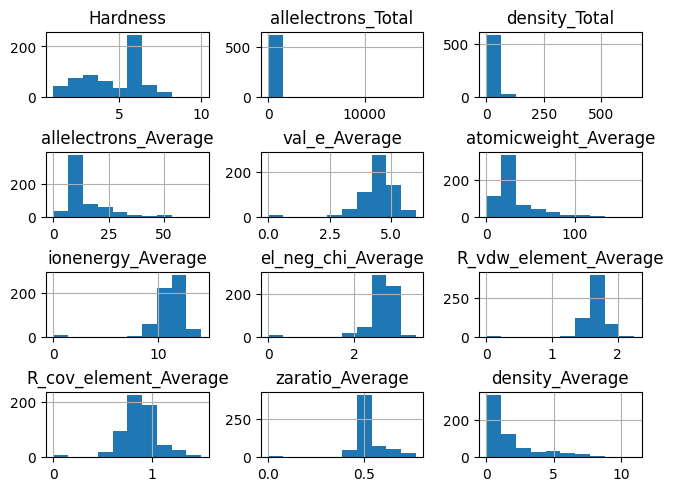

In [8]:
# 12 columns in df
fig, axis = plt.subplots(4, 3, layout='constrained')
df.hist(ax=axis)
plt.show

There seem to be outliers in 'allelectrons_Total'. Let's investigate.

In [9]:
df['allelectrons_Total'].describe()

count      622.000000
mean       312.895691
std        853.331650
min          0.000000
25%         98.250000
50%        186.500000
75%        390.000000
max      15300.000000
Name: allelectrons_Total, dtype: float64

In [10]:
df_temp = df.sort_values(by=['allelectrons_Total'], ascending=False)
df_temp.head(10)

,Hardness,allelectrons_Total,density_Total,allelectrons_Average,val_e_Average,atomicweight_Average,ionenergy_Average,el_neg_chi_Average,R_vdw_element_Average,R_cov_element_Average,zaratio_Average,density_Average
38,1.8,15300.0,643.093804,9.592476,5.989969,19.195928,12.958928,3.264690,1.575699,0.720100,0.500405,0.403194
78,2.3,10116.0,502.575708,9.543396,5.781132,19.379077,12.976603,3.184434,1.577104,0.731830,0.497615,0.474128
369,2.3,9852.0,27.421875,7.977328,5.967611,15.953775,13.582798,3.426381,1.521587,0.641522,0.500783,0.022204
379,1.8,3328.0,4.489619,8.000000,5.951923,15.999172,13.569409,3.419904,1.522260,0.644038,0.502280,0.010792
61,4.8,1894.0,25.982136,8.417778,5.795556,16.839527,13.265820,3.321600,1.556178,0.680356,0.504142,0.115476
333,2.8,1266.0,78.067347,8.063694,5.401274,16.423573,12.944249,3.179236,1.569682,0.677834,0.505076,0.497244
332,2.8,1264.0,77.061347,8.050955,5.401274,16.408152,12.944736,3.178981,1.569809,0.679108,0.505030,0.490837
310,3.2,1228.0,74.328372,9.746032,5.634921,19.789142,12.920761,3.139603,1.578333,0.733968,0.503851,0.589908
96,2.8,1196.0,51.811371,9.492063,5.809524,18.996993,12.815213,3.199762,1.580238,0.732381,0.507239,0.411201
265,3.5,1106.0,127.513962,28.358974,5.230769,67.881426,11.153654,2.768205,1.749231,0.943077,0.471995,3.269589


As we can see, this value drops quickly. It seems to be a case of outliers as opposed to faulty data. We will move on to examining the correlations between these features.

<Axes: >

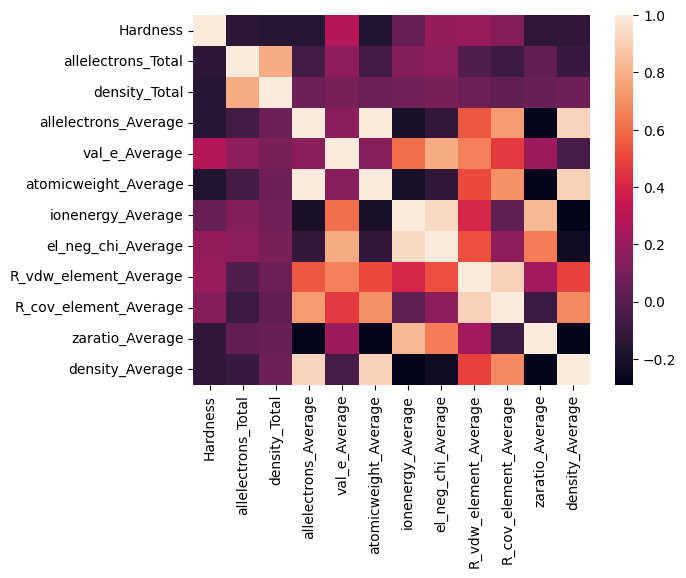

In [11]:
sns.heatmap(df.corr())

Here we observe some correlation between features. Let's look at the features highly correlated with each other and inspect their relationships with scatterplots.

In [12]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Find pairs of variables with correlation > 0.7
threshold = 0.7
high_corr_pairs = []

for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            high_corr_pairs.append((correlation_matrix.columns[i], correlation_matrix.columns[j], correlation_matrix.iloc[i, j]))

# Sort the pairs by the absolute value of their correlation coefficient in descending order
high_corr_pairs.sort(key=lambda x: abs(x[2]), reverse=True)

# Print the pairs of variables with correlation > 0.7
for pair in high_corr_pairs:
    print(f"Correlation between {pair[0]} and {pair[1]}: {pair[2]}")

Correlation between allelectrons_Average and atomicweight_Average: 0.9981232579375362
Correlation between ionenergy_Average and el_neg_chi_Average: 0.9379818687695906
Correlation between allelectrons_Average and density_Average: 0.9243371128092429
Correlation between atomicweight_Average and density_Average: 0.9120033965735981
Correlation between R_vdw_element_Average and R_cov_element_Average: 0.9102774421759656
Correlation between ionenergy_Average and zaratio_Average: 0.8293349790095845
Correlation between allelectrons_Total and density_Total: 0.788563381820675
Correlation between val_e_Average and el_neg_chi_Average: 0.783607470913236
Correlation between allelectrons_Average and R_cov_element_Average: 0.7352890082968531
Correlation between atomicweight_Average and R_cov_element_Average: 0.7031851979840523


<Axes: xlabel='allelectrons_Average', ylabel='atomicweight_Average'>

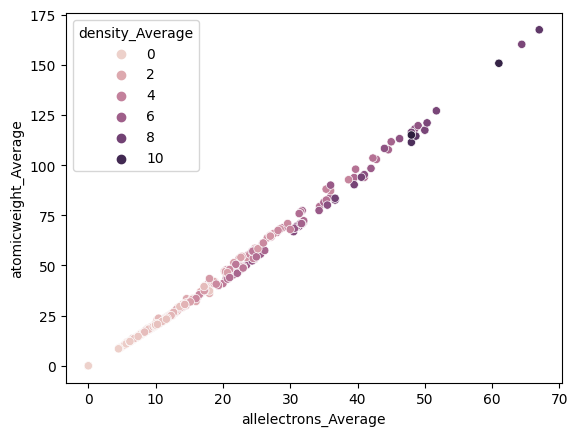

In [13]:
sns.scatterplot(data=df, x='allelectrons_Average', y='atomicweight_Average', hue='density_Average')

<Axes: xlabel='ionenergy_Average', ylabel='el_neg_chi_Average'>

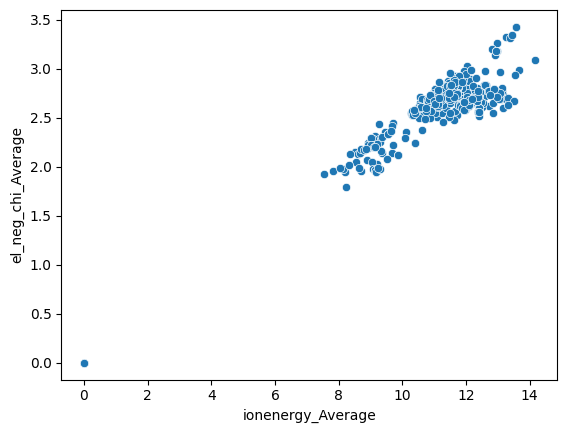

In [14]:
sns.scatterplot(data=df, x='ionenergy_Average', y='el_neg_chi_Average')

<Axes: xlabel='R_vdw_element_Average', ylabel='R_cov_element_Average'>

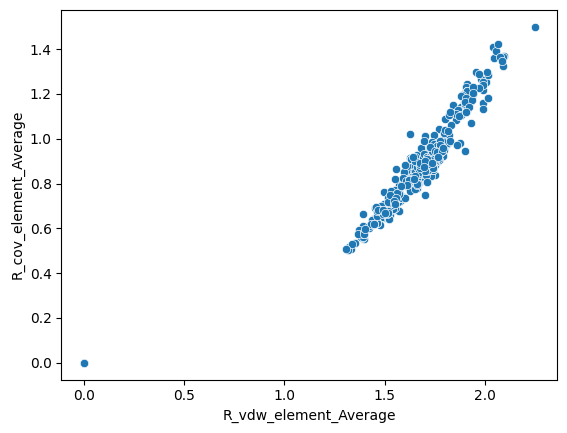

In [15]:
sns.scatterplot(data=df, x='R_vdw_element_Average', y='R_cov_element_Average')

In the machine learning context, these relationships will serve as the basis for PCA and dimentional analysis. What seems to be the most interesting would be the top figure, and we will try to derive some relationship here.

In [16]:
from sklearn.linear_model import LinearRegression
X = df['allelectrons_Average'].values.reshape(-1, 1)
y = df['atomicweight_Average'].values.reshape(-1, 1)
reg = LinearRegression().fit(X, y)
print('score', reg.score(X, y))
print('coefficient', reg.coef_)
print('intercept', reg.intercept_)

score 0.9962500380358394
coefficient [[2.46288287]]
intercept [-4.22685985]
